In [1]:
import numpy as np
import pandas as pd

In [2]:
dat = pd.read_csv("./wides/t8.csv")
dat = dat.drop(["PostnatalSleep", "marital_status", "hisp_latino_p",
                "race", "PregnancyOverseeing-Age35plus"], axis=1)
dat["deptarget"] = dat["Depression"] > 0
dat = dat.drop(["MyLua_Index_PatientID", "Depression"], axis=1)
dat = dat.dropna()

In [3]:
y = dat["deptarget"]
X = dat.copy().drop(["deptarget"], axis=1)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [28]:
X_train

,MyLua_OBEpisode_ID,Age,PHQ_Dep,EPDS_Dep,Anxiety,Autoimmune,BetaBlockers,Cervix-Infection,CesareanBirth,Complication-AlcoholUse,...,Sleep,Smoking,ThreatenedAbortion,ThreatenedMiscarriage,UncomplicatedBirth,Vomiting,PrenatalDepressionInd,PriorDepressionInd,PriorAbortiveOutcome,NonMinority
1751,1,29,False,False,0,0,0,0,0,0,...,0,0,0,0,1,1,0,False,False,True
4562,1,31,False,False,0,0,0,0,0,0,...,0,2,0,0,0,0,0,False,False,True
5025,2,19,False,False,0,0,0,0,0,0,...,0,0,1,1,1,1,0,False,False,True
4565,1,21,False,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,False,False,True
1444,1,24,False,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,1,25,False,False,0,0,0,0,0,0,...,0,0,0,0,0,1,0,False,False,False
1725,2,29,False,False,1,0,0,0,0,0,...,0,2,0,0,0,1,0,True,False,True
4079,2,27,False,False,1,0,0,0,0,0,...,0,0,0,0,1,0,2,True,False,False
2254,1,18,False,False,0,0,0,0,0,0,...,0,0,0,0,0,0,0,False,False,False


In [ ]:
## standardization?

In [5]:
#from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

#reg = Lasso(alpha=1)
#reg.fit(X_train, y_train)
log = LogisticRegression(penalty='l1', solver='liblinear')
log.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
log.coef_

array([[-3.28710079e-01, -2.27991418e-02,  6.42940016e+00,
         8.07033352e+00,  8.05422984e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.60200289e-01,
         0.00000000e+00,  1.02918266e-01, -7.06994066e-01,
         0.00000000e+00, -7.33144278e-01,  3.68048232e-01,
         3.14675002e-01, -1.05692192e-01,  5.44253160e-02,
        -4.47596760e-02, -4.49640172e-01,  1.18224670e-02,
         7.87106447e-02, -4.65251287e-02, -8.34981908e-01,
         3.22137295e-04, -1.64509406e-01, -8.13246807e-02,
         5.37581480e-02,  0.00000000e+00,  1.25078257e-01,
         0.00000000e+00,  4.66384018e-02,  8.49927401e-02,
         8.25604664e-02,  3.08061422e-01,  1.02219254e+00,
        -9.07660081e-01,  1.96596596e-01]])

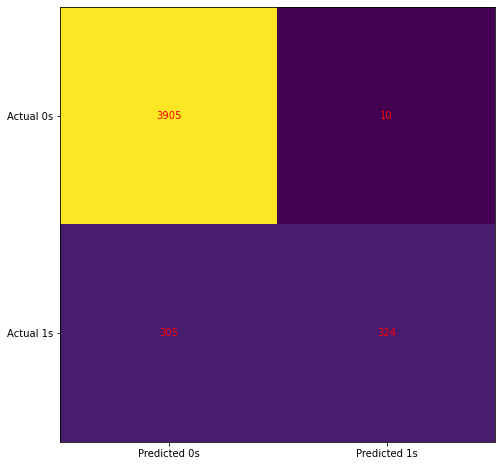

In [7]:

cm = confusion_matrix(y_train, log.predict(X_train))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [9]:
print(classification_report(y_train, log.predict(X_train)))

              precision    recall  f1-score   support

       False       0.93      1.00      0.96      3915
        True       0.97      0.52      0.67       629

    accuracy                           0.93      4544
   macro avg       0.95      0.76      0.82      4544
weighted avg       0.93      0.93      0.92      4544



In [10]:
log.score(X_train, y_train)

0.9306778169014085

In [11]:
log.score(X_test, y_test, )

0.9366197183098591

In [8]:
def get_trimester_score(trinum):
    fpath = "./wides/t{}.csv".format(trinum)
    dat = pd.read_csv(fpath)
    if "PostnatalSleep" in dat.columns:
        dat = dat.drop(["PostnatalSleep", "marital_status", "hisp_latino_p",
                        "race", "PregnancyOverseeing-Age35plus"], axis=1)
    else:
        dat = dat.drop(["marital_status", "hisp_latino_p",
                        "race", "PregnancyOverseeing-Age35plus"], axis=1)
    dat["deptarget"] = dat["Depression"] > 0
    dat = dat.drop(["MyLua_Index_PatientID", "Depression"], axis=1)
    dat = dat.dropna()

    y = dat["deptarget"]
    X = dat.copy().drop(["deptarget"], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

    log = LogisticRegression(penalty='l1', solver='liblinear')
    log.fit(X_train, y_train)
    the_score = log.score(X_test, y_test)
    return((trinum, the_score))

<AxesSubplot:xlabel='up_to_trimester'>

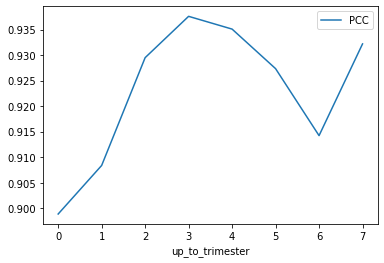

In [9]:
results = [get_trimester_score(x) for x in range(0,8)]
results = pd.DataFrame(results, columns=["up_to_trimester", "PCC"])
results.plot(kind="line", x="up_to_trimester", y="PCC")

In [50]:
dat = pd.read_csv("./wides/t8.csv")
dat = dat.drop(["PostnatalSleep", "marital_status", "hisp_latino_p",
                "race", "PregnancyOverseeing-Age35plus"], axis=1)
dat["deptarget"] = dat["Depression"] > 0
dat = dat.drop(["MyLua_Index_PatientID", "Depression"], axis=1)
dat = dat.dropna()

y = dat["deptarget"]
X = dat.copy().drop(["deptarget"], axis=1)

In [51]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

cv = LeaveOneOut()

y_true, y_pred = list(), list()

COUNT = 0
for train_ix, test_ix in cv.split(X):
    COUNT = COUNT + 1
    if (COUNT % 300) == 0:
        print("{}% done".format(round(COUNT/X.shape[0]*100), 2))
    #if COUNT > 400:
    #    break
    X_train, X_test = X.copy().iloc[train_ix, :], X.copy().iloc[test_ix, :]
    y_train, y_test = y.copy().iloc[train_ix], y.copy().iloc[test_ix]
    log = LogisticRegression(penalty='l1', solver='liblinear')
    log.fit(X_train, y_train)

    yhat = log.predict(X_test)
    y_true.append(y_test.iloc[0])
    y_pred.append(yhat[0])

acc = accuracy_score(y_true, y_pred)
print('Accuracy: %.3f' % acc)
#print(y_true)
#print(y_pred)

5%
11%
16%
21%
26%
32%
37%
42%
48%
53%
58%
63%
69%
74%
79%
85%
90%
95%
Accuracy: 0.930


In [52]:
def get_trimester_score(trinum):
    fpath = "./wides/t{}.csv".format(trinum)
    dat = pd.read_csv(fpath)
    if "PostnatalSleep" in dat.columns:
        dat = dat.drop(["PostnatalSleep", "marital_status", "hisp_latino_p",
                        "race", "PregnancyOverseeing-Age35plus"], axis=1)
    else:
        dat = dat.drop(["marital_status", "hisp_latino_p",
                        "race", "PregnancyOverseeing-Age35plus"], axis=1)
    dat["deptarget"] = dat["Depression"] > 0
    dat = dat.drop(["MyLua_Index_PatientID", "Depression"], axis=1)
    dat = dat.dropna()

    y = dat["deptarget"]
    X = dat.copy().drop(["deptarget"], axis=1)

    cv = LeaveOneOut()

    y_true, y_pred = list(), list()

    COUNT = 0
    for train_ix, test_ix in cv.split(X):
        COUNT = COUNT + 1
        if (COUNT % 300) == 0:
            print("{}% done".format(round(COUNT/X.shape[0]*100), 2))
        #if COUNT > 400:
        #    break
        X_train, X_test = X.copy().iloc[train_ix, :], X.copy().iloc[test_ix, :]
        y_train, y_test = y.copy().iloc[train_ix], y.copy().iloc[test_ix]
        log = LogisticRegression(penalty='l1', solver='liblinear')
        log.fit(X_train, y_train)

        yhat = log.predict(X_test)
        y_true.append(y_test.iloc[0])
        y_pred.append(yhat[0])

    acc = accuracy_score(y_true, y_pred)
    return((trinum, acc))



In [53]:
results = [get_trimester_score(x) for x in range(0,8)]

14% done
27% done
41% done
54% done
68% done
81% done
95% done
8% done
15% done
23% done
31% done
39% done
46% done
54% done
62% done
70% done
77% done
85% done
93% done
6% done
12% done
18% done
24% done
30% done
36% done
42% done
48% done
54% done
60% done
66% done
73% done
79% done
85% done
91% done
97% done
5% done
10% done
15% done
20% done
25% done
30% done
35% done
40% done
45% done
50% done
55% done
60% done
65% done
70% done
75% done
80% done
85% done
90% done
95% done
100% done
6% done
12% done
18% done
24% done
29% done
35% done
41% done
47% done
53% done
59% done
65% done
71% done
77% done
83% done
88% done
94% done
6% done
11% done
17% done
23% done
28% done
34% done
40% done
45% done
51% done
57% done
62% done
68% done
74% done
79% done
85% done
91% done
96% done
5% done
11% done
16% done
22% done
27% done
33% done
38% done
44% done
49% done
55% done
60% done
66% done
71% done
77% done
82% done
88% done
93% done
99% done
5% done
11% done
16% done
21% done
27% done
32% don

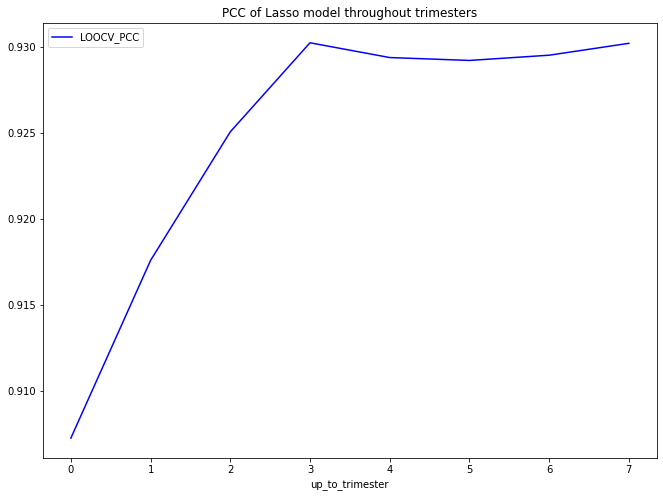

In [67]:
df_results = pd.DataFrame(results, columns=["up_to_trimester", "LOOCV_PCC"])
plot = df_results.plot(kind="line", x="up_to_trimester", y="LOOCV_PCC",
                      title="PCC of Lasso model throughout trimesters",
                      figsize=(11, 8), color="blue")
fig = plot.get_figure()
fig.savefig("./results/py-pcc-lasso.png")

In [56]:
df_results.to_csv("./results/py-lasso-pcc.csv", index=False)